### A Quick Machine Learning Modelling Tutorial with Python and Scikit-Learn
This notebook goes through a range of common and useful featues of the Scikit-Learn library.

There's a bunch here but I'm calling it quick because of how vast the Scikit-Learn librara stepis.

#### What is Scikit-Learn (sklearn)?

[Scikit-Learn](https://scikit-learn.org/stable/index.html), also referred to as `sklearn`, is an open-source Python machine learning library.

It's built on top on NumPy (Python library for numerical computing) and Matplotlib (Python library for data visualization).

####  Why Scikit-Learn?

Although the fields of data science and machine learning are vast, the main goal is finding patterns within data and then using those patterns to make predictions.
And there are certain categories which a majority of problems fall into.

If you're trying to create a machine learning model to predict whether an email is spam and or not spam, you're working on a [classification problem](https://en.wikipedia.org/wiki/Statistical_classification#Binary_and_multiclass_classification) (whether something is one thing or another).

If you're trying to create a machine learning model to predict the price of houses given their characteristics, you're working on a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) (predicting a number).

If you're trying to get a machine learning algorithm to group together similar samples (that you don't necessarily know which should go together), you're working on a [clustering problem](https://developers.google.com/machine-learning/clustering/overview).

Once you know what kind of problem you're working on, there are also similar steps you'll take for each. Steps like splitting the data into different sets, one for your machine learning algorithms to learn on (the training set) and another to test them on (the testing set).

Choosing a machine learning model and then evaluating whether or not your model has learned anything.

Scikit-Learn offers Python implementations for doing all of these kinds of tasks (from preparing data to modelling data). Saving you from having to build them from scratch.

#### Where can I get help?

If you get stuck or think of something you'd like to do which this notebook doesn't cover, don't fear!

The recommended steps you take are:
1. **Try it** - Since Scikit-Learn has been designed with usability in mind, your first step should be to use what you know and try figure out the answer to your own question (getting it wrong is part of the process). If in doubt, run your code.
2. **Press SHIFT+TAB** - See you can the docstring of a function (information on what the function does) by pressing **SHIFT + TAB** inside it. Doing this is a good habit to develop. It'll improve your research skills and give you a better understanding of the library. 
3. **Search for it** - If trying it on your own doesn't work, since someone else has probably tried to do something similar, try searching for your problem. You'll likely end up in 1 of 2 places:
    * [Scikit-Learn documentation/user guide](https://scikit-learn.org/stable/user_guide.html) - the most extensive resource you'll find for Scikit-Learn information.
    * [Stack Overflow](https://stackoverflow.com/) - this is the developers Q&A hub, it's full of questions and answers of different problems across a wide range of software development topics and chances are, there's one related to your problem.
    * [ChatGPT](https://chat.openai.com/) - ChatGPT is very good at explaining code, however, it can make mistakes. Best to verify the code it writes first before using it. Try asking "Can you explain the following code for me? {your code here}" and then continue with follow up questions from there.
    rom there.

### An end-to-end Scikit-Learn workflow
Before we get in-depth, let's quickly check out what an end-to-end Scikit-Learn workflow might look like.

Once we've seen an end-to-end workflow, we'll dive into each step a little deeper.

Following are the steps generally we have to take to approach a Machine learnig Problem using scikit Learn Framework:
##### imports Libraries, Load Dataset, Data analysis, Data Visualization
1. Getting data ready(split into features and labels, prepare train and test steps)
2. Model Building and use it to make a prediction
3. Choosing a model for our problem
4. Evaluate the model
5. Experiment to improve
6. Save a model for someone else to use

### imports Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Load Dataset

In [4]:

Iris_data =  pd.read_csv('Extended_iris_dataset.csv')
print(type(Iris_data))
#Iris_data.to_string()
Iris_data

<class 'pandas.core.frame.DataFrame'>


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,5.197881,3.785514,1.818680,0.022290,Iris-setosa
2,5.922168,4.191233,1.050877,0.120056,Iris-setosa
3,5.530965,3.923595,1.209235,0.464339,Iris-setosa
4,5.464908,3.366796,1.454111,0.364683,Iris-setosa
...,...,...,...,...,...
292,5.600000,2.800000,4.900000,2.000000,Iris-virginica
293,7.700000,2.800000,6.700000,2.000000,Iris-virginica
294,6.300000,2.700000,4.900000,1.800000,Iris-virginica
295,5.700000,2.500000,5.000000,2.000000,Iris-virginica


### Data Analysis using Pandas

In [5]:
# Count the number of occurrences of each species
species_counts = Iris_data['Species'].value_counts()

print(species_counts)

Species
Iris-versicolor    100
Iris-virginica      99
Iris-setosa         98
Name: count, dtype: int64


In [6]:
print(Iris_data.shape)

(297, 5)


In [7]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  297 non-null    float64
 1   SepalWidth   297 non-null    float64
 2   PetalLength  297 non-null    float64
 3   PetalWidth   297 non-null    float64
 4   Species      297 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.7+ KB


In [8]:
Iris_data.describe(include = "all")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,297.000000,297.000000,297.000000,297.000000,297
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,100
mean,5.867948,3.076995,3.778423,1.201876,NaN
std,0.818254,0.441841,1.768406,0.756095,NaN
min,4.300000,2.000000,0.965148,-0.096278,NaN
25%,5.186564,2.800000,1.534998,0.312420,NaN
50%,5.842467,3.001606,4.400000,1.321906,NaN
75%,6.400000,3.391550,5.113245,1.800000,NaN


In [9]:
Iris_data.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,5.197881,3.785514,1.818680,0.022290,Iris-setosa
2,5.922168,4.191233,1.050877,0.120056,Iris-setosa
3,5.530965,3.923595,1.209235,0.464339,Iris-setosa
4,5.464908,3.366796,1.454111,0.364683,Iris-setosa


### Data Visualization

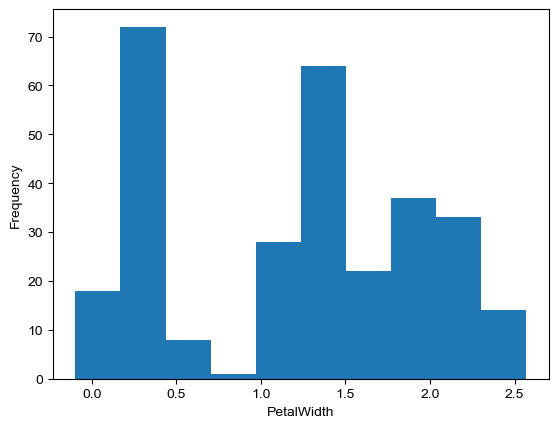

In [10]:
# draw lineplot  
Iris_data["PetalWidth"].plot(kind='hist')  
  
# changing the theme to dark 
sns.set_style("whitegrid") 
plt.xlabel("PetalWidth")
plt.show()

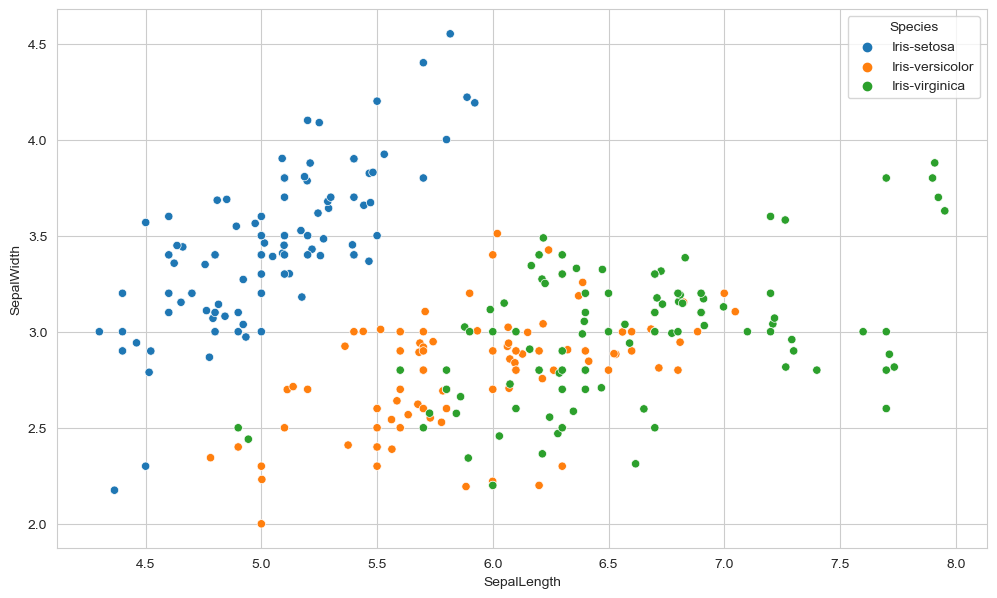

In [11]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="SepalLength", y="SepalWidth", data=Iris_data,hue="Species") 
plt.show()


F:\Program-Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Program-Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Program-Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Program-Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

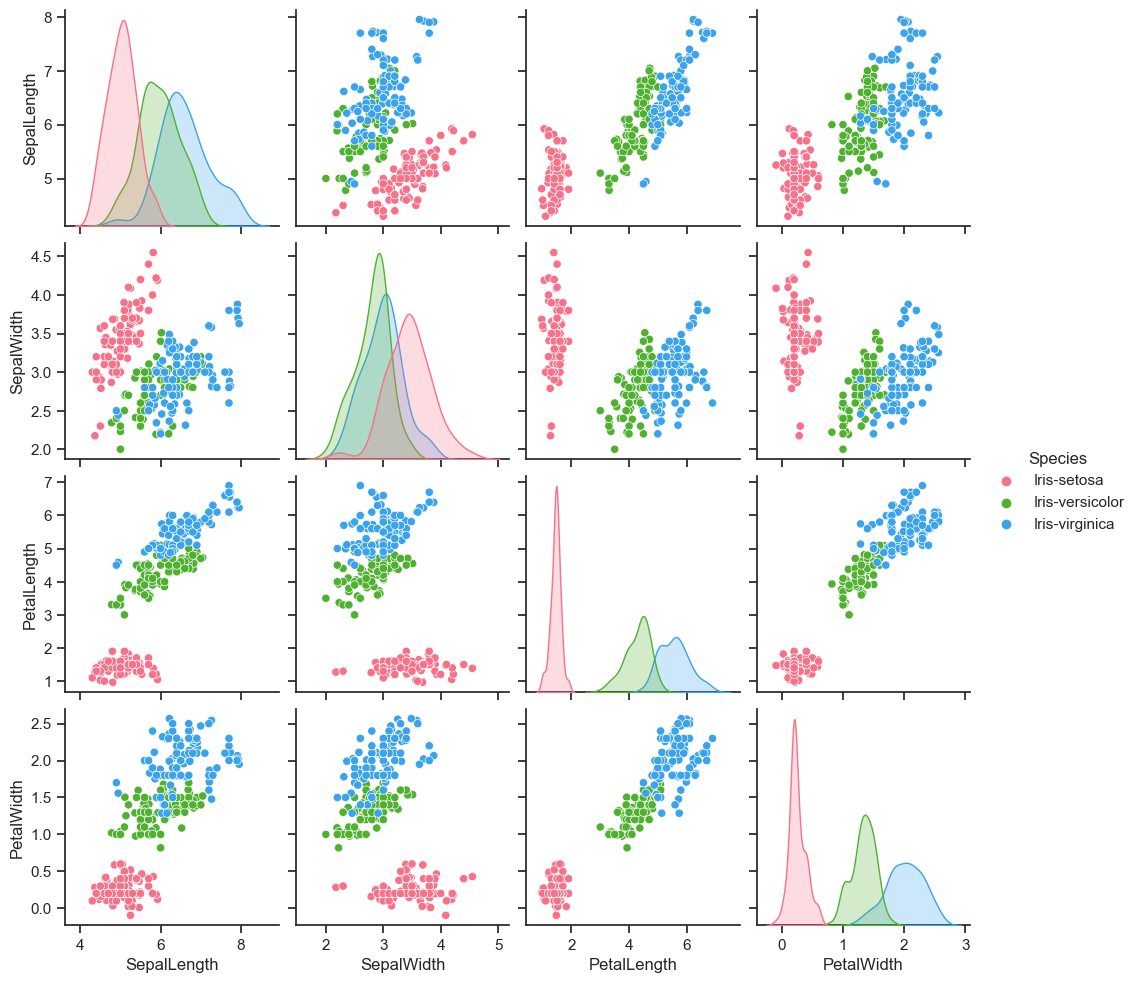

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(Iris_data,hue = 'Species',diag_kind = "kde",kind = "scatter",palette = "husl")

In [13]:
sliced_df = Iris_data.loc[:  , ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
print(sliced_df)
sliced_df.corr()

     SepalLength  SepalWidth  PetalLength  PetalWidth
0       5.100000    3.500000     1.400000    0.200000
1       5.197881    3.785514     1.818680    0.022290
2       5.922168    4.191233     1.050877    0.120056
3       5.530965    3.923595     1.209235    0.464339
4       5.464908    3.366796     1.454111    0.364683
..           ...         ...          ...         ...
292     5.600000    2.800000     4.900000    2.000000
293     7.700000    2.800000     6.700000    2.000000
294     6.300000    2.700000     4.900000    1.800000
295     5.700000    2.500000     5.000000    2.000000
296     6.245615    2.555197     4.878641    1.667343

[297 rows x 4 columns]


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.098464,0.858738,0.801925
SepalWidth,-0.098464,1.000000,-0.430489,-0.361559
PetalLength,0.858738,-0.430489,1.000000,0.957223
PetalWidth,0.801925,-0.361559,0.957223,1.000000


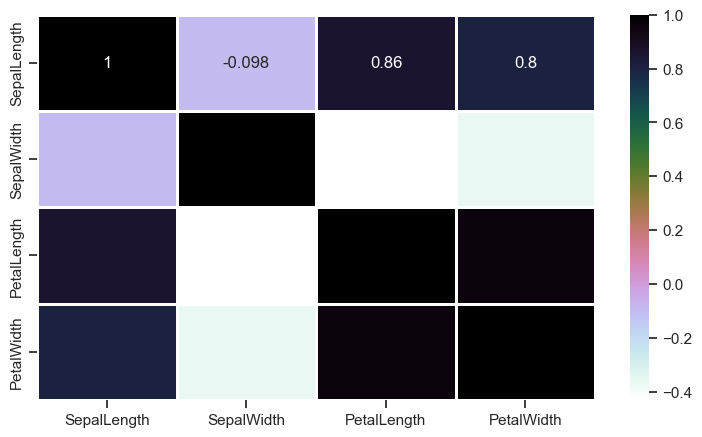

In [14]:
plt.figure(figsize=(9,5)) #figure with a size of 7x5 inches
sns.heatmap(sliced_df.corr(), annot=True,cbar=True, cmap='cubehelix_r',linewidths=0.8)
plt.show()

### Data set splitting to Train set and Test set


In [15]:
Iris_data_df_to_array = Iris_data.to_numpy()

In [16]:
print(Iris_data_df_to_array[0,:])

[5.1 3.5 1.4 0.2 'Iris-setosa']


In [17]:
# Feature Matrix
X = Iris_data_df_to_array[:, :(len(Iris_data_df_to_array[0,:])-1)]


In [18]:
# Target Matrix
y = Iris_data_df_to_array[:,4]


##### The random_state parameter controls the shuffling of the data before splitting.
    1. random_state=0: This ensures that the data split is reproducible. Every time you run the code with random_state=0, you will get the same train and test sets. This is useful for consistent results, especially when comparing the performance of different models or running experiments multiple times.
    2. random_state=None: When random_state is set to None (which is the default), the random number generator is used to shuffle the data, but the seed is not fixed. This means that each time you run the code, you will get a different train-test split.Use this when you are not concerned about reproducibility and want to explore different train-test splits each time you run your code
    3. random_state=42: This is a commonly used seed value,  Setting it to 0 will also produce reproducible results, but the split will be different from the split produced with random_state=42.


In [19]:
# Data Splitting between training set and test set(Validation Data) 
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
# View the different shapes of the training and test datasets
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((222, 4), (75, 4), (222,), (75,))

### Model Building and Prediction to see which Model performs the best

In [21]:
from sklearn.linear_model import LogisticRegression
# Model1 Logistic regression
iris_model = LogisticRegression()

In [22]:
# model fitting
iris_model.fit(train_X,train_y)


LogisticRegression()

In [23]:
# model prediction
val_predictions = iris_model.predict(val_X)
val_predictions.shape

(75,)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(val_y,val_predictions)*100)

96.0


In [26]:
#Model2 DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
ModelDC= DecisionTreeClassifier()
ModelDC.fit(train_X,train_y)

DecisionTreeClassifier()

In [27]:
predictionDC=ModelDC.predict(val_X)
print(accuracy_score(val_y,predictionDC)*100)

94.66666666666667


In [28]:
#Model 3 SVC
from sklearn.svm import SVC
Model_SVC= SVC()
Model_SVC.fit(train_X,train_y)

SVC()

In [29]:
prediction_SVC=Model_SVC.predict(val_X)
print(accuracy_score(val_y,prediction_SVC)*100)

94.66666666666667


In [30]:
from sklearn.ensemble import RandomForestClassifier
ModelRf=RandomForestClassifier()
ModelRf.fit(train_X,train_y)

RandomForestClassifier()

In [31]:
predictionRf=ModelDC.predict(val_X)
print(accuracy_score(val_y,predictionRf)*100)

94.66666666666667


Thanks to the consistency of Scikit-Learn's API design, we can use virtually the same code to fit, score and make predictions with each of our models.

To see which model performs best, we'll do the following:
1. Instantiate each model in a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check the results

If you're wondering what it means to instantiate each model in a dictionary, see the example below.

In [35]:
# Create a dictionary called models which contains all of the classification models we've imported
# The models dictionary should contain 4 models

models = {"DecisionTree": DecisionTreeClassifier(),
          "RandomForest": RandomForestClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

# Create an empty dictionary called results
results = {}

Since each model we're using has the same `fit()` and `score()` functions, we can loop through our models dictionary and, call `fit()` on the training data and then call `score()` with the test data.

In [36]:
# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(train_X,train_y)
    mypredict=model.predict(val_X)
    results[model_name] = accuracy_score(val_y,mypredict)*100
    
results

{'DecisionTree': 94.66666666666667,
 'RandomForest': 94.66666666666667,
 'SVC': 94.66666666666667,
 'LogisticRegression': 96.0}

 Which model performed the best? 
* Do the results change each time you run the cell? 
* Why do you think this is?

Due to the randomness of how each model finds patterns in the data, you might notice different results each time.

Without manually setting the random state using the `random_state` parameter of some models  every time you run the cell, you'll get slightly different results.


#### Let's make our results a little more visual using graph


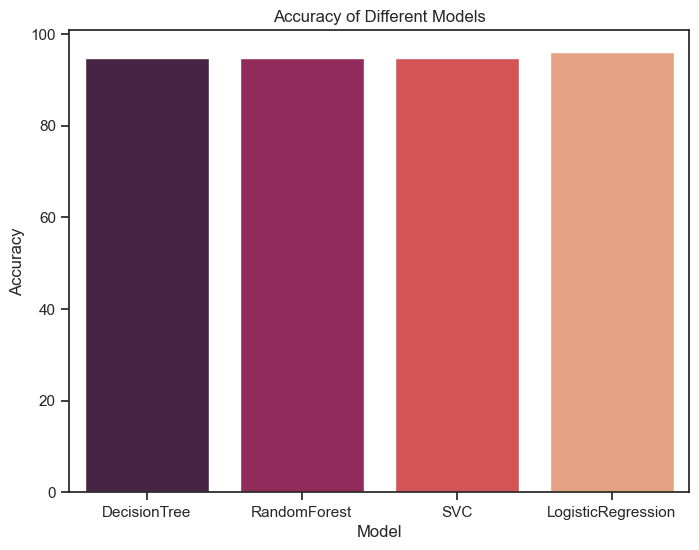

In [37]:
results.items()

# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Create a bar plot of the results dataframe using sns.barplot()
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='rocket')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Accuracy')
sns.set_style('whitegrid')
plt.title('Accuracy of Different Models')

# Display the plot
plt.show()


### Start Modelling using Logistic Regression

In [38]:
# Creating Prediction DataFrame Table
predicted_df = pd.DataFrame(val_X ,columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
predicted_df["Predicted Species"] = val_predictions
predicted_df["Actual Species"] = val_y
predicted_df['True State'] = (val_y == val_predictions).reshape(len(val_predictions),1)
#print((val_y == val_predictions).shape)
#print(val_y == val_predictions)
print(predicted_df.to_string())

   SepalLength SepalWidth PetalLength PetalWidth Predicted Species   Actual Species  True State
0     5.700153   2.919529    4.275097   1.214568   Iris-versicolor  Iris-versicolor        True
1          6.7        3.0         5.0        1.7   Iris-versicolor  Iris-versicolor        True
2      4.65288   3.153055    1.617455   0.105876       Iris-setosa      Iris-setosa        True
3     7.263558   3.581411    6.100162    2.54437    Iris-virginica   Iris-virginica        True
4     6.019508   3.510819    4.548792   1.537369   Iris-versicolor  Iris-versicolor        True
5          5.0        3.0         1.6        0.2       Iris-setosa      Iris-setosa        True
6     6.348184   2.585848    4.959341   1.879615    Iris-virginica   Iris-virginica        True
7          5.7        2.6         3.5        1.0   Iris-versicolor  Iris-versicolor        True
8          5.9        3.2         4.8        1.8    Iris-virginica  Iris-versicolor       False
9     6.617026   2.312471     5.70131   

#### How Accuracy Testing is calculated from the Prediction Dataframe table(Optional)

In [44]:
truth_state_series = pd.Series(val_predictions == val_y)
#print(truth_state_series)
total_test_count = len(val_y)
hit_count = len(truth_state_series[truth_state_series == True])
miss_count = len(truth_state_series[truth_state_series == False])

In [45]:
def accuracy(hit=0,total_test=0):
    return (hit/total_test)*100

In [46]:
print('--',hit_count, '-- prediction out of --', total_test_count,\
    '-- was HIT and --', miss_count,'-- MISSED with hit rate of --',\
    accuracy(hit=hit_count,total_test=total_test_count),' %--', sep = ' ')

-- 72 -- prediction out of -- 75 -- was HIT and -- 3 -- MISSED with hit rate of -- 96.0  %--


### A detailed classification report to evaluate the performance of a classification model

In [47]:
#Precision, recall, and F1 score are metrics used to evaluate the performance of a classification model
from sklearn.metrics import classification_report
print(classification_report(val_y,val_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      0.90      0.92        20
 Iris-virginica       0.94      0.97      0.95        32

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_y,val_predictions))

[[23  0  0]
 [ 0 18  2]
 [ 0  1 31]]


### Regularization to improve the performance of your model
Effect of C:
1. Large C Value: When C is large, the regularization term is smaller, meaning less regularization is applied. The model will try to fit the training data as closely as possible, potentially leading to overfitting.The model may achieve high training accuracy but could perform poorly on test data due to overfitting.
2. Small C Value: When C is small, stronger regularization is applied. This means the model is penalized more for complexity, leading to simpler models that may generalize better to unseen data, reducing overfitting risks.The model may have lower training accuracy but better generalization on test data, avoiding overfitting.
A commonly recommended range for C is from 0.001 to 100

In [49]:
# Initialize and fit the model with L2 regularization
iris_model_optimized = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=200) 
iris_model_optimized.fit(train_X,train_y)  
# Print the parameters

#iris_model2.get_params()

LogisticRegression(max_iter=200)

In [51]:
# again Predict and Re-evaluate
y_pred = iris_model_optimized.predict(val_X)
print(f'Accuracy: {accuracy_score(val_y, y_pred)*100}')
print(classification_report(val_y, y_pred))

Accuracy: 96.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      0.90      0.92        20
 Iris-virginica       0.94      0.97      0.95        32

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



### Using Your Model to Predict real life Unseen features

In [52]:
def testSpecies(sl = 0, sw = 0, pl = 0, pw = 0):
    features = np.array([[sl , sw , pl , pw ]])
    real_life_predictions = iris_model_optimized.predict(features)
    return real_life_predictions[0]

In [53]:
print('Enter The Following Details To Know Your Species: ')
sepalLength = eval(input("Enter SepalLength = "))
sepalWidth = eval(input("Enter SepalWidth = "))
petalLength = eval(input("Enter PetalLength = "))
petalWidth = eval(input("Enter PeralWidth = "))
print("The Predicted Sepcies Of The new Features You Enter is :",testSpecies(sl = sepalLength, sw = sepalWidth,  pl = petalLength, pw = petalWidth))

Enter The Following Details To Know Your Species: 


Enter SepalLength =  2
Enter SepalWidth =  1
Enter PetalLength =  3
Enter PeralWidth =  4


The Predicted Sepcies Of The new Features You Enter is : Iris-virginica


## Read the below facts :

#### Q) In machine learning modelling if my model perform prediction on testing data with 100 percent accuracy is it a good sign? 
In machine learning, achieving 100% accuracy on testing data is often a sign of overfitting rather than a good model. Overfitting occurs when a model learns the training data too well, including noise and details that do not generalize to new data. This means the model may perform exceptionally well on the training and testing data but poorly on unseen data

#### Q) Suppose my model created from a default algorithm parameter setting,my model may score accuracy of 94.56667 percent, now if I do hyperparameter tuning or regularization optimizing the parameters how much percentage do you think this model will improve generally? 
The improvement in model performance from hyperparameter tuning or regularization depends on various factors, including the initial performance, the complexity of the problem, the quality and quantity of the data, and the specific algorithm used. While it's challenging to predict the exact percentage improvement, here are some general insights:
1. Incremental Improvements: If your model already has high accuracy (e.g., 94.57%), hyperparameter tuning and regularization typically result in incremental improvements. You might see gains of 1-5%, but this can vary significantly.

2. Complex Problems: For more complex problems or datasets with higher variance, the improvement can be more substantial, especially if the default parameters were far from optimal.

3. Algorithm Sensitivity: Some algorithms are more sensitive to hyperparameter tuning than others. For instance, models like gradient boosting machines or deep neural networks can see more significant improvements compared to simpler models like logistic regression or decision trees.

Data Quality: The impact of hyperparameter tuning also depends on data quality. High-quality, well-preprocessed data can help achieve better results from tuning.

#### Q) In machine learning, generally what percentage is consider a low, medium and high accuracy score ?
In machine learning, what is considered a low, medium, or high accuracy score can vary depending on the complexity of the dataset, the problem domain, and the expectations for performance. Additionally, other metrics such as precision, recall, F1 score, and AUC-ROC might be more appropriate for evaluating performance in certain contexts, especially in imbalanced datasets.
Here’s a general guideline, considering both the complexity of the dataset and the problem domain:
1. Simple Datasets:
a) Low Accuracy: Below 70%

Example: Basic binary classification with well-separated classes.

b) Medium Accuracy: 70-90%

Example: Standard classification problems with some overlapping features.

c) High Accuracy: Above 90%

Example: Highly structured datasets with clear patterns and little noise.

3. Moderate Complexity Datasets:
a) Low Accuracy: Below 60%

Example: Datasets with moderate noise and overlapping class features.

b) Medium Accuracy: 60-80%

Example: Multiclass classification with a moderate number of features.

c) High Accuracy: Above 80%

Example: Problems where the model can capture most of the relevant patterns but with some remaining complexity.

5. High Complexity Datasets:
a) Low Accuracy: Below 50%

Example: Datasets with significant noise, high-dimensionality, or complex relationships.

b) Medium Accuracy: 50-70%

Example: Problems with multiple classes, high feature interactions, and non-linear relationships.

c) High Accuracy: Above 70%

Example: Advanced problems like image recognition, natural language processing, or where achieving high accuracy is particularly challenging.